# Unit 5 - Financial Planning

In [54]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [55]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [56]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [58]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
requests.get(btc_url)
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
eth_url = eth_url + "?format=json"
requests.get(eth_url)
eth_response_data = requests.get(eth_url)

# Compute current value of my Bitcoin crpto
btc_response_data = btc_response_data.json()
btc_price_current = float(btc_response_data['data']['1']['quotes']['USD']['price'])
my_btc_value = my_btc*btc_price_current

# Compute current value of my Ethereum crpto
eth_response_data = eth_response_data.json()
eth_price_current = float(eth_response_data['data']['1027']['quotes']['USD']['price'])
my_eth_value = my_eth*eth_price_current

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28964.40
The current value of your 5.3 ETH is $10187.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [59]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [60]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [61]:
# Format current date as ISO format
current_date = pd.Timestamp("2022-08-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
df_ticker.head()

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2022-08-11 04:00:00+00:00  423.0  424.95  419.21  419.99  59337460   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-08-11 04:00:00+00:00      443453  421.578655  103.38  103.63  102.615   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-11 04:00:00+00:00  102.66  8499300       24163  103.070842

In [62]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.66
Current SPY closing price: $419.99


In [63]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20999.50
The current value of your 200 AGG shares is $20532.00


### Savings Health Analysis

In [64]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value+my_eth_value
my_shares_value = my_agg_value+my_spy_value

# Create savings DataFrame
savings = {   
    "amount":[my_shares_value,my_crypto_value],
    "crypto": [my_crypto_value],
    "shares": [my_shares_value],
}

df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,41531.500
shares,39151.636


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

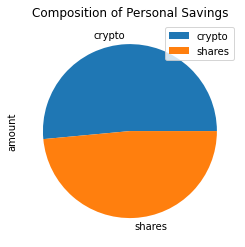

In [65]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [66]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amt = my_shares_value + my_crypto_value

# Validate saving health
if total_savings_amt > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings_amt == emergency_fund:
    print("Congratulations on reaching your financial goal.")
elif total_savings_amt < emergency_fund:
    print(f"You are ${(emergency_fund - total_savings_amt)} away from reaching your savings goal of ${emergency_fund}.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [67]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-08-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-11', tz='America/New_York').isoformat()

In [68]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ['SPY', 'AGG']
timeframe = "1Day"

df_hist_data = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_hist_data[df_hist_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_hist_data[df_hist_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_hist_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_hist_data.tail()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-05 04:00:00+00:00  409.68  414.15  409.60  413.47  56751151   
2022-08-08 04:00:00+00:00  415.25  417.62  411.83  412.99  53867272   
2022-08-09 04:00:00+00:00  412.30  412.75  410.22  411.35  44110509   
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99  68139304   
2022-08-11 04:00:00+00:00  423.00  424.95  419.21  419.99  59337460   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-08-05 04:00:00+00:00      455450  412.292366  102.81  102.830  102.5200   
2022-08-08 04:00:00+00:00      421156  414.421803  103.10  103.290  103.0400   
2022-08-09 04:00:00+00:00      366275  411.331714  102.92  103.045  102.8400   
2022-08-10 04:00:00+00:00      473663  418.182059  103.43  103.675  103.1095   
2022-08-11 04:00:00+00:00      443453  421.578655  103.38  103.630  102.6150   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-05 04:00:00+00:00  102.71  4847064       16418  102.711038  
2022-08-08 04:00:00+00:00  103.18  3219068       15830  103.175213  
2022-08-09 04:00:00+00:00  102.95  3849491       17130  102.948831  
2022-08-10 04:00:00+00:00  103.21  6848952       19064  103.486096  
2022-08-11 04:00:00+00:00  102.66  8499300       24163  103.070842

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
years = 30

trading_days = 252*years

MC_simulation = MCSimulation(
    portfolio_data = df_hist_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = trading_days
)

In [70]:
# Printing the simulation input data
MC_simulation.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
2017-08-14 04:00:00+00:00  245.55  246.79  245.55  246.54   73291919   
2017-08-15 04:00:00+00:00  247.00  247.00  246.16  246.51   55242746   
2017-08-16 04:00:00+00:00  247.09  247.57  246.45  246.94   56715544   
2017-08-17 04:00:00+00:00  246.26  246.60  243.09  243.09  128100396   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-11 04:00:00+00:00      278786  244.222867          NaN  109.75   
2017-08-14 04:00:00+00:00      227671  246.332178     0.009913  109.84   
2017-08-15 04:00:00+00:00      177920  246.593306    -0.000122  109.56   
2017-08-16 04:00:00+00:00      212681  247.016600     0.001744  109.54   
2017-08-17 04:00:00+00:00      428148  244.766670    -0.015591  109.83   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2017-08-11 04:00:00+00:00  109.9400  109.68  109.87  1913253       10113   
2017-08-14 04:00:00+00:00  109.8969  109.74  109.82  2294261       10792   
2017-08-15 04:00:00+00:00  109.7150  109.56  109.66  2177420        8298   
2017-08-16 04:00:00+00:00  109.9300  109.54  109.86  1956479        9864   
2017-08-17 04:00:00+00:00  110.0200  109.78  110.02  5403527       10956   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-11 04:00:00+00:00  109.860974          NaN  
2017-08-14 04:00:00+00:00  109.825015    -0.000455  
2017-08-15 04:00:00+00:00  109.654240    -0.001457  
2017-08-16 04:00:00+00:00  109.770591     0.001824  
2017-08-17 04:00:00+00:00  109.943594     0.001456

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ray_k\Copy_ASU_Main_Repo\Module5_Starter_code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003416,0.995535,1.002909,1.013014,0.987109,1.007871,0.999340,0.999072,1.009179,1.008286,...,1.008590,1.001298,0.985129,0.984044,1.013295,0.987977,1.004521,1.005208,0.999538,1.001397
2,1.014643,0.999546,1.003127,1.019451,0.990561,1.003192,0.990567,0.991449,1.007146,0.998760,...,1.012557,0.990750,1.000820,0.973421,1.013772,0.986380,1.010586,0.996711,1.004050,1.002016
3,1.017560,0.985186,1.000150,1.010524,0.982486,1.011937,0.983162,0.993637,1.003111,0.988071,...,1.011041,0.996058,0.999703,0.975529,1.010605,0.989175,1.009823,1.002808,1.000143,0.982850
4,1.022766,0.991264,0.994193,1.017861,0.988604,1.002380,0.986697,0.978514,1.001947,1.000718,...,1.010085,0.985552,1.003194,0.970892,0.992769,0.993117,1.012052,1.010413,0.996635,0.974453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.212658,8.570361,21.392496,24.796607,6.169971,2.804922,14.907073,8.650198,7.930545,12.487979,...,12.241595,6.623702,10.133711,2.947045,5.976177,1.650306,11.039626,4.296250,14.869157,6.480426
7557,11.290955,8.616347,21.349408,24.713156,6.307239,2.841250,14.807509,8.802217,8.052115,12.678723,...,12.185738,6.643946,10.154898,2.975060,5.954107,1.653053,10.882782,4.244462,14.788583,6.507676
7558,11.289589,8.615259,21.127028,24.689774,6.295379,2.821505,14.765120,8.781362,8.026176,12.773472,...,12.174597,6.650212,10.358154,2.991029,5.997266,1.649068,10.856369,4.264142,14.771806,6.494371
7559,11.143081,8.522385,21.133353,24.717186,6.218025,2.861444,15.018407,8.729984,8.125793,12.734221,...,12.127892,6.680141,10.407672,2.994665,6.026094,1.636538,10.821294,4.226617,14.758550,6.407516


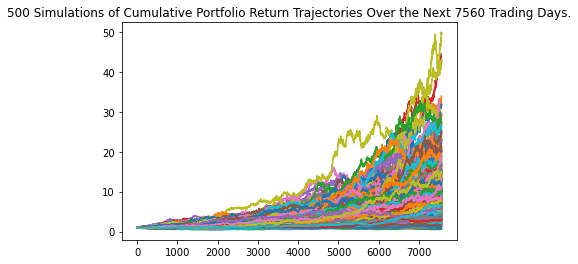

In [73]:
# Plot simulation outcomes
outcomes_plot = MC_simulation.plot_simulation()

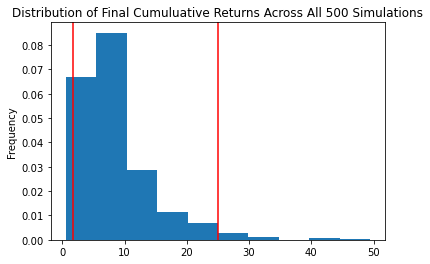

In [74]:
# Plot probability distribution and confidence intervals
dist_plot = MC_simulation.plot_distribution()

### Retirement Analysis

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(sum_stat)

count           500.000000
mean              8.656480
std               6.280705
min               0.535941
25%               4.528549
50%               7.037585
75%              10.406879
max              49.460015
95% CI Lower      1.761757
95% CI Upper     25.052808
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [76]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stat[8]*initial_investment)
ci_upper = round(sum_stat[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35235 and $501056


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [77]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stat[8]*initial_investment)
ci_upper = round(sum_stat[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $52853 and $751584


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_hist_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_five_year.portfolio_data.tail()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-05 04:00:00+00:00  409.68  414.15  409.60  413.47  56751151   
2022-08-08 04:00:00+00:00  415.25  417.62  411.83  412.99  53867272   
2022-08-09 04:00:00+00:00  412.30  412.75  410.22  411.35  44110509   
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99  68139304   
2022-08-11 04:00:00+00:00  423.00  424.95  419.21  419.99  59337460   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-08-05 04:00:00+00:00      455450  412.292366    -0.001690  102.81   
2022-08-08 04:00:00+00:00      421156  414.421803    -0.001161  103.10   
2022-08-09 04:00:00+00:00      366275  411.331714    -0.003971  102.92   
2022-08-10 04:00:00+00:00      473663  418.182059     0.021004  103.43   
2022-08-11 04:00:00+00:00      443453  421.578655     0.000000  103.38   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2022-08-05 04:00:00+00:00  102.830  102.5200  102.71  4847064       16418   
2022-08-08 04:00:00+00:00  103.290  103.0400  103.18  3219068       15830   
2022-08-09 04:00:00+00:00  103.045  102.8400  102.95  3849491       17130   
2022-08-10 04:00:00+00:00  103.675  103.1095  103.21  6848952       19064   
2022-08-11 04:00:00+00:00  103.630  102.6150  102.66  8499300       24163   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-08-05 04:00:00+00:00  102.711038    -0.011168  
2022-08-08 04:00:00+00:00  103.175213     0.004576  
2022-08-09 04:00:00+00:00  102.948831    -0.002229  
2022-08-10 04:00:00+00:00  103.486096     0.002525  
2022-08-11 04:00:00+00:00  103.070842    -0.005329

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ray_k\Copy_ASU_Main_Repo\Module5_Starter_code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006056,0.998047,0.995218,1.001842,1.000583,0.995997,1.014736,1.005640,1.007860,1.001975,...,0.995674,1.010017,1.006886,0.994330,0.997858,1.003672,1.005332,0.999995,0.997281,0.994368
2,1.009555,0.980365,0.991261,0.993251,0.992545,1.013559,1.019442,1.007862,1.013073,1.003760,...,1.003399,0.997039,1.008132,0.993320,1.008267,0.992979,0.995979,1.000762,1.006280,1.004176
3,1.011445,0.982388,0.975831,0.986867,1.001658,1.019043,1.024026,1.009648,1.008802,0.994906,...,1.003320,1.002545,0.996178,1.001434,0.995132,0.998804,1.016241,0.999830,1.004144,1.002211
4,1.017347,0.980423,0.974588,0.990675,1.000469,1.014796,1.023754,1.011159,1.008111,1.011439,...,1.018557,1.007963,0.998002,0.998964,0.981625,1.008790,1.018365,0.998728,0.996298,0.991035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.484689,1.300669,1.704620,0.896221,2.177096,1.294471,0.948576,2.548620,1.232628,0.839327,...,1.371614,1.085533,0.907839,1.335540,1.102070,2.002426,1.324817,1.177072,1.340045,1.089913
1257,1.475007,1.306482,1.721439,0.902630,2.204783,1.307743,0.944959,2.521867,1.236417,0.835440,...,1.372738,1.082246,0.913793,1.341331,1.102374,2.017937,1.329434,1.159090,1.324743,1.080874
1258,1.473231,1.303708,1.738198,0.912869,2.206224,1.309899,0.937033,2.516818,1.234854,0.837380,...,1.374166,1.091823,0.912999,1.320777,1.104262,2.017407,1.352424,1.152453,1.329358,1.087811
1259,1.470794,1.303718,1.747874,0.907774,2.214259,1.305562,0.925399,2.522573,1.237408,0.838234,...,1.365952,1.092251,0.904944,1.335472,1.100822,2.020465,1.354420,1.138496,1.324317,1.085112


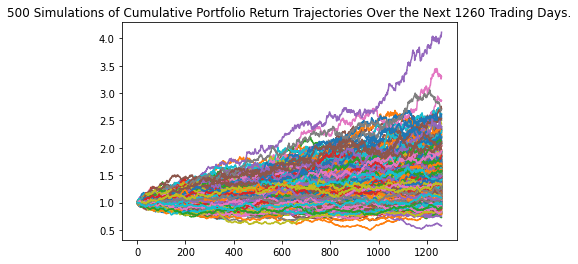

In [82]:
# Plot simulation outcomes
outcomes_plot = MC_five_year.plot_simulation()

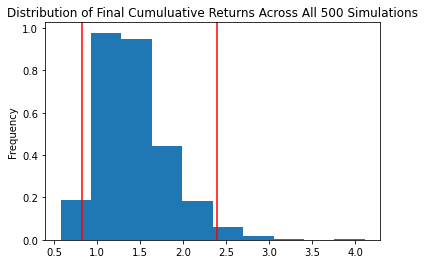

In [83]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat_5 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(sum_stat_5)

count           500.000000
mean              1.435749
std               0.420335
min               0.576165
25%               1.139416
50%               1.363509
75%               1.637077
max               4.112118
95% CI Lower      0.825891
95% CI Upper      2.389414
Name: 1260, dtype: float64


In [85]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stat[8]*initial_investment,2)
ci_upper_five = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $35235.15 and $501056.16


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_hist_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_year.portfolio_data

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
2017-08-14 04:00:00+00:00  245.55  246.79  245.55  246.54   73291919   
2017-08-15 04:00:00+00:00  247.00  247.00  246.16  246.51   55242746   
2017-08-16 04:00:00+00:00  247.09  247.57  246.45  246.94   56715544   
2017-08-17 04:00:00+00:00  246.26  246.60  243.09  243.09  128100396   
...                           ...     ...     ...     ...        ...   
2022-08-05 04:00:00+00:00  409.68  414.15  409.60  413.47   56751151   
2022-08-08 04:00:00+00:00  415.25  417.62  411.83  412.99   53867272   
2022-08-09 04:00:00+00:00  412.30  412.75  410.22  411.35   44110509   
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99   68139304   
2022-08-11 04:00:00+00:00  423.00  424.95  419.21  419.99   59337460   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-11 04:00:00+00:00      278786  244.222867          NaN  109.75   
2017-08-14 04:00:00+00:00      227671  246.332178     0.009913  109.84   
2017-08-15 04:00:00+00:00      177920  246.593306    -0.000122  109.56   
2017-08-16 04:00:00+00:00      212681  247.016600     0.001744  109.54   
2017-08-17 04:00:00+00:00      428148  244.766670    -0.015591  109.83   
...                               ...         ...          ...     ...   
2022-08-05 04:00:00+00:00      455450  412.292366    -0.001690  102.81   
2022-08-08 04:00:00+00:00      421156  414.421803    -0.001161  103.10   
2022-08-09 04:00:00+00:00      366275  411.331714    -0.003971  102.92   
2022-08-10 04:00:00+00:00      473663  418.182059     0.021004  103.43   
2022-08-11 04:00:00+00:00      443453  421.578655     0.000000  103.38   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2017-08-11 04:00:00+00:00  109.9400  109.6800  109.87  1913253       10113   
2017-08-14 04:00:00+00:00  109.8969  109.7400  109.82  2294261       10792   
2017-08-15 04:00:00+00:00  109.7150  109.5600  109.66  2177420        8298   
2017-08-16 04:00:00+00:00  109.9300  109.5400  109.86  1956479        9864   
2017-08-17 04:00:00+00:00  110.0200  109.7800  110.02  5403527       10956   
...                             ...       ...     ...      ...         ...   
2022-08-05 04:00:00+00:00  102.8300  102.5200  102.71  4847064       16418   
2022-08-08 04:00:00+00:00  103.2900  103.0400  103.18  3219068       15830   
2022-08-09 04:00:00+00:00  103.0450  102.8400  102.95  3849491       17130   
2022-08-10 04:00:00+00:00  103.6750  103.1095  103.21  6848952       19064   
2022-08-11 04:00:00+00:00  103.6300  102.6150  102.66  8499300       24163   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-11 04:00:00+00:00  109.860974          NaN  
2017-08-14 04:00:00+00:00  109.825015    -0.000455  
2017-08-15 04:00:00+00:00  109.654240    -0.001457  
2017-08-16 04:00:00+00:00  109.770591     0.001824  
2017-08-17 04:00:00+00:00  109.943594     0.001456  
...                               ...          ...  
2022-08-05 04:00:00+00:00  102.711038    -0.011168  
2022-08-08 04:00:00+00:00  103.175213     0.004576  
2022-08-09 04:00:00+00:00  102.948831    -0.002229  
2022-08-10 04:00:00+00:00  103.486096     0.002525  
2022-08-11 04:00:00+00:00  103.070842    -0.005329  

[1259 rows x 16 columns]

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ray_k\Copy_ASU_Main_Repo\Module5_Starter_code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984943,1.002026,0.990218,0.991149,1.002761,1.006773,1.009394,0.995672,1.000171,1.004977,...,0.993147,1.006479,1.006394,0.991581,1.015955,1.011858,1.005393,1.005288,1.000679,1.000946
2,0.993345,1.002208,0.987184,0.985605,1.008938,1.019285,1.005446,1.005661,0.994326,0.990522,...,0.987123,1.001076,1.014557,0.997423,1.002250,1.003446,0.998151,1.013578,1.003204,1.003164
3,0.991307,1.006018,0.987436,0.988136,1.014904,1.029464,1.002236,1.000313,0.999426,0.994659,...,0.989888,0.991503,1.011489,1.003653,0.991138,1.002669,1.004069,1.000951,1.008238,0.995708
4,0.986219,0.997442,0.990330,0.988972,1.012431,1.020866,1.014779,1.003765,0.998715,0.994960,...,0.991262,0.996860,1.015600,1.007315,0.997063,1.004480,1.005083,0.998124,1.012186,1.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.998182,1.269797,2.044659,3.916772,1.400824,1.721219,2.738912,2.101429,2.471431,2.233298,...,2.301021,1.913050,1.243925,2.314827,0.653768,2.129785,1.651578,2.451757,2.880411,1.411621
2517,0.995001,1.263782,2.045440,3.913744,1.394893,1.711431,2.730336,2.085912,2.503468,2.228150,...,2.308657,1.909040,1.252176,2.310908,0.648199,2.159235,1.642032,2.439797,2.870268,1.427599
2518,0.997246,1.264705,2.027511,3.945594,1.395354,1.717979,2.709122,2.077374,2.518607,2.255567,...,2.340673,1.927992,1.245904,2.313717,0.646821,2.151522,1.655187,2.486365,2.859373,1.446141
2519,0.995994,1.256087,2.024953,3.964681,1.409150,1.688536,2.724230,2.088891,2.523161,2.224731,...,2.333477,1.934660,1.241352,2.334808,0.654883,2.185920,1.640368,2.476300,2.896461,1.436702


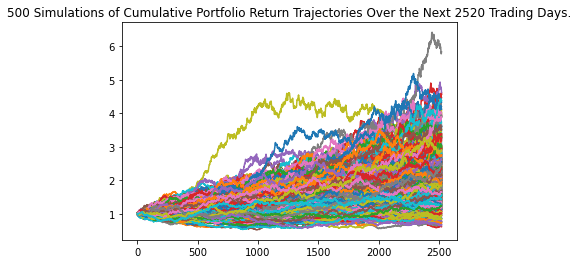

In [88]:
# Plot simulation outcomes
outcomes_plot = MC_ten_year.plot_simulation()

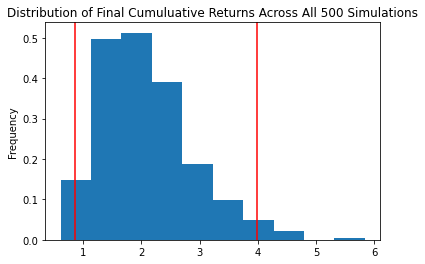

In [89]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat_10 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(sum_stat_10)

count           500.000000
mean              2.081543
std               0.789606
min               0.611503
25%               1.496384
50%               1.964596
75%               2.544697
max               5.838305
95% CI Lower      0.858479
95% CI Upper      3.985638
Name: 2520, dtype: float64


In [91]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stat[8]*initial_investment,2)
ci_upper_ten = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $105705.44 and $1503168.49
